<a href="https://colab.research.google.com/github/geocarvalho/uni-proj/blob/master/IN1119/stat_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados populacionais gerais
## Teste de normalidade (Shapiro-Wilk)


In [0]:
library('ggplot2')
library('dplyr')
set.seed(1234)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [11]:
# Open file
df <- read.csv('suicidio_prop_100k_hab_ano_2010-2017.csv')

# Transpose columns as rows
# t_df <- setNames(data.frame(t(df[,-1])), df[,1])
# t_df <- tibble::rowid_to_column(t_df, 'month')
df$proporcao <- df$obitos_por_residencia / df$pop_br_ibge
df$proporcao_100k <- (df$obitos_por_residencia * 100000) / df$pop_br_ibge
df

ano_do_obito,obitos_por_residencia,pop_br_ibge,proporcao,proporcao_100k
<int>,<int>,<int>,<dbl>,<dbl>
2010,9448,194890682,4.847846e-05,4.847846
2011,9852,196603732,5.011095e-05,5.011095
2012,10321,198314934,5.204348e-05,5.204348
2013,10533,200004188,5.266390e-05,5.266390
2014,10653,201717541,5.281147e-05,5.281147
2015,11178,203475683,5.493531e-05,5.493531
2016,11433,205156587,5.572816e-05,5.572816
2017,12495,206804741,6.041931e-05,6.041931


In [32]:
df_mes <- read.csv('suicidios_mes_2015-2017.csv')
t_df_mes <- setNames(data.frame(t(df_mes[,-1])), df_mes[,1])
t_df_mes <- tibble::rowid_to_column(t_df_mes, 'month')
t_df_mes$'2017_prop_100k' <- (t_df_mes$'2017_obt' * 100000) / t_df_mes$'2017_pop'
t_df_mes$'2016_prop_100k' <- (t_df_mes$'2016_obt' * 100000) / t_df_mes$'2016_pop'
t_df_mes$'2015_prop_100k' <- (t_df_mes$'2015_obt' * 100000) / t_df_mes$'2015_pop'

t_df_mes

month,2017_obt,2016_obt,2015_obt,2017_pop,2015_pop,2016_pop,2017_prop_100k,2016_prop_100k,2015_prop_100k
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1059,941,1047,206003753,202609241,204314268,0.5140683,0.4605650,0.5167583
2,967,926,852,206143689,202751801,204455719,0.4690903,0.4529098,0.4202182
3,1055,929,947,206283480,202894285,204597060,0.5114321,0.4540632,0.4667455
4,923,919,935,206423124,203036688,204738287,0.4471398,0.4488657,0.4605079
5,1029,927,899,206562618,203179009,204879397,0.4981540,0.4524613,0.4424670
6,932,879,867,206701959,203321245,205020388,0.4508907,0.4287378,0.4264188
7,938,925,851,206841144,203463392,205161258,0.4534881,0.4508649,0.4182571
8,1071,910,915,206980170,203605449,205302002,0.5174409,0.4432495,0.4493986
9,1135,962,902,207119034,203747412,205442619,0.5479941,0.4682573,0.4427050


## Normality test for 2017

In [30]:
# Normality test with Shapiro-Wilk for 2017 proportion (100k) during the months
shapiro.test(t_df_mes$'2017_prop_100k')


	Shapiro-Wilk normality test

data:  t_df_mes$"2017_prop_100k"
W = 0.93883, p-value = 0.4831


In [31]:
# Normality test with Kolmogorov-Smirnov for 2017 proportion (100k) during the months
ks.test(t_df_mes$'2017_prop_100k', "pnorm", mean(t_df_mes$'2017_prop_100k'), sd(t_df_mes$'2017_prop_100k'))


	One-sample Kolmogorov-Smirnov test

data:  t_df_mes$"2017_prop_100k"
D = 0.15738, p-value = 0.8833
alternative hypothesis: two-sided


## Normality test for 2016

In [34]:
# Normality test with Shapiro-Wilk for 2016 proportion (100k) during the months
shapiro.test(t_df_mes$'2016_prop_100k')


	Shapiro-Wilk normality test

data:  t_df_mes$"2016_prop_100k"
W = 0.86435, p-value = 0.05544


In [36]:
# Normality test with Kolmogorov-Smirnov for 2016 proportion (100k) during the months
ks.test(t_df_mes$'2016_prop_100k', "pnorm", mean(t_df_mes$'2016_prop_100k'), sd(t_df_mes$'2016_prop_100k'))


	One-sample Kolmogorov-Smirnov test

data:  t_df_mes$"2016_prop_100k"
D = 0.23774, p-value = 0.4387
alternative hypothesis: two-sided


## Normality test for 2015

In [35]:
# Normality test with Shapiro-Wilk for 2015 proportion (100k) during the months
shapiro.test(t_df_mes$'2015_prop_100k')


	Shapiro-Wilk normality test

data:  t_df_mes$"2015_prop_100k"
W = 0.90531, p-value = 0.1857


In [37]:
# Normality test with Kolmogorov-Smirnov for 2015 proportion (100k) during the months
ks.test(t_df_mes$'2015_prop_100k', "pnorm", mean(t_df_mes$'2015_prop_100k'), sd(t_df_mes$'2015_prop_100k'))


	One-sample Kolmogorov-Smirnov test

data:  t_df_mes$"2015_prop_100k"
D = 0.16165, p-value = 0.8639
alternative hypothesis: two-sided


> Como vimos, não conseguimos rejeitar a hipótese nula para as proporções a cada 100 mil habitantes (`p > 0.05`) nos anos de 2015, 2016 e 2017. Assim, esses conjuntos de dados foram extraídos de uma população com distribuição normal.

## Análise gráfica

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

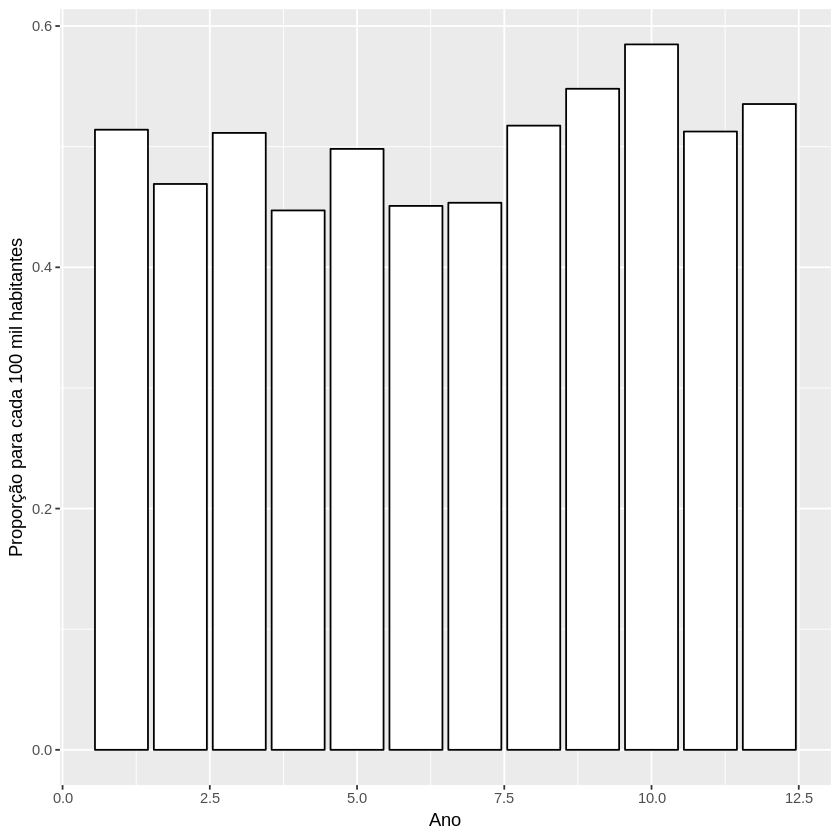

In [38]:
# Plot graph to proportion 2017 col
ggplot(t_df_mes, aes(t_df_mes$'month', t_df_mes$'2017_prop_100k')) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

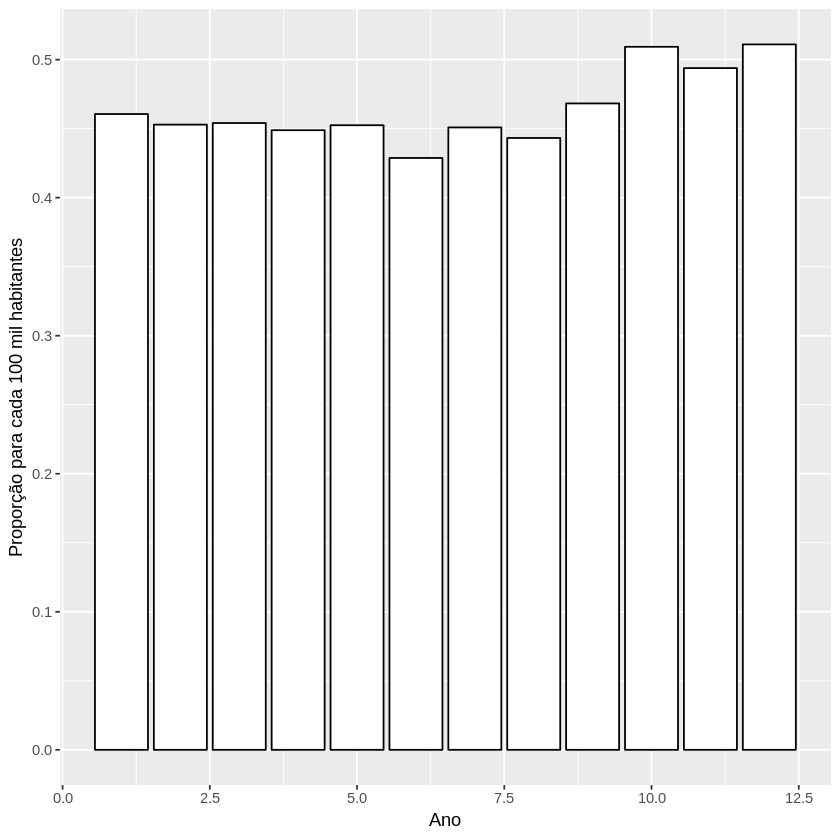

In [39]:
# Plot graph to proportion 2016 col
ggplot(t_df_mes, aes(t_df_mes$'month', t_df_mes$'2016_prop_100k')) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”

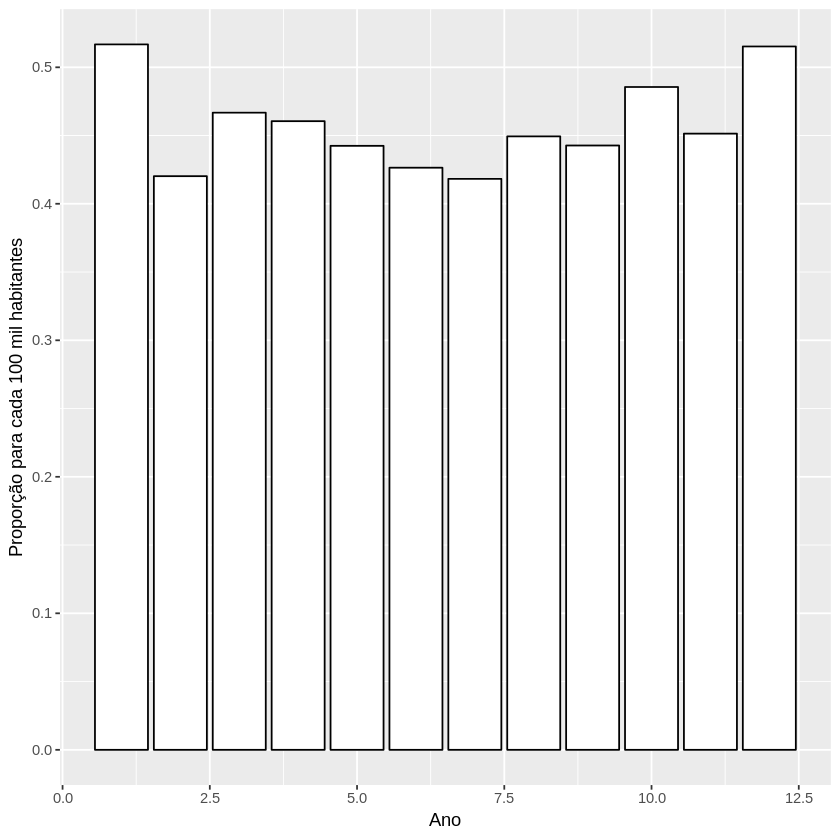

In [40]:
# Plot graph to proportion 2015 col
ggplot(t_df_mes, aes(t_df_mes$'month', t_df_mes$'2015_prop_100k')) + 
geom_histogram(stat='identity', fill='white', colour='black') + 
labs(x='Ano', y='Proporção para cada 100 mil habitantes')

## Teste de hipótese para duas proporções

In [41]:
# There are difference between 2015 and 2016 proportions
prop.test(
  x=c(df$obitos_por_residencia[6], df$obitos_por_residencia[7]), 
  n=c(df$pop_br_ibge[6], df$pop_br_ibge[7]),
  alternative='two.sided')


	2-sample test for equality of proportions with continuity correction

data:  c(df$obitos_por_residencia[6], df$obitos_por_residencia[7]) out of c(df$pop_br_ibge[6], df$pop_br_ibge[7])
X-squared = 1.1463, df = 1, p-value = 0.2843
alternative hypothesis: two.sided
95 percent confidence interval:
 -2.240142e-06  6.544363e-07
sample estimates:
      prop 1       prop 2 
5.493531e-05 5.572816e-05 


> Ao nível de 95 % de confiança **não há forte evidência** de diferença (`p > 0.05`) entre as proporções de suicídios de 2015 e 2016. Ao contrário do que foi afirmado na reportagem, em que houve aumento de um ano para o outro

In [42]:
# And about 2016 to 2017?
prop.test(
  x=c(df$obitos_por_residencia[7], df$obitos_por_residencia[8]), 
  n=c(df$pop_br_ibge[7], df$pop_br_ibge[8]),
  alternative='two.sided')


	2-sample test for equality of proportions with continuity correction

data:  c(df$obitos_por_residencia[7], df$obitos_por_residencia[8]) out of c(df$pop_br_ibge[7], df$pop_br_ibge[8])
X-squared = 38.942, df = 1, p-value = 4.365e-10
alternative hypothesis: two.sided
95 percent confidence interval:
 -6.167621e-06 -3.214673e-06
sample estimates:
      prop 1       prop 2 
5.572816e-05 6.041931e-05 


> Ao nível de 95 % de confiança **há fortes evidências** da diferença (`p < 0.05`) de proporções de suicídios de 2016 e 2017.[link text](https://)

# Análise populacional por faixa etaria e sexo
## Abrindo o arquivo

## Checar normalidade das duas amostras com Shapiro-Wilk

## Referências

1. Dados no [repositório](https://github.com/geocarvalho/uni-proj/blob/master/IN1119/stat_project.ipynb)